# House Rocket

Esse é um desafio proposto pelo Meigarom do blog https://sejaumdatascientist.com/ e consiste da seguinte situação:

"A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?"

Considerando que todas as casas estão a venda e podem ser reformadas, algumas hipóteses foram listadas para serem validadas:

    H0: Imóveis que possuem vista para água são 30% mais caros, na média; 
    H1: Imóveis que possuem vista 3 ou 4 são 20% mais caros, na média;
    H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média; 
    H3: Imóveis sem porão possuem sqrt_lot 50% maiores do que com porão; 
    H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%; 
    H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%; 
    H6: Imóveis anunciados no verão são 10% mais caros, na média;
    H7: Imóveis reformados são 20% mais caros, na mesma região e na média;
    H8: Há uma alta correlação entre sqft_living e price;

Lembrar das etapas do projeto:
1. <input type="checkbox"/> Questão de negócio 
2. <input type="checkbox"/> Premissas de negócio
3. <input type="checkbox"/> Planejamento da solução
4. <input type="checkbox"/> Os 5 principais insights dos dados
5. <input type="checkbox"/> Resultados financeiros para o negócio
6. <input type="checkbox"/> Conclusão
7. <input type="checkbox"/> Recomendações/Próximos passos

## Extraction
- Limpar a base
- Encontrar outliers

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

- date: data de venda
- price: preço de venda
- bedrooms: número de quartos
- bathrooms: número de banheiros
- sqft_living: tamanho da área habitacional em pés²
- sqft_lot: tamanho do lote em pés²
- floors: número de andares
- waterfront: ‘1’ se a propriedade for à beira-mar, ‘0’ se não.
- view: um índice de 0 a 4 do quão bom é a visão da propriedade (imagine 0 para uma propriedade com visão para um beco sujo e 4 para uma propriedade com visão para um lindo parque)
- condition: condição da casa, com valores de 1 até 5
- grade: classificação pela qualidade do material da casa. Construções com melhores materiais normalmente custam mais caro
- sqft_above: pés² acima do solo
- sqft_basement: pés² abaixo do solo
- yr_built: ano de construção
- yr_renovated: ano de renovação. ‘0’ se nunca foi renovada
- zipcode: código zip de 5 dígitos
- lat, long: latitude e longitude
- squft_livng15: tamanho médio das 15 casas mais próximas, em pés²
- sqft_lot15: tamanho médio dos lotes das 15 casas mais próximas, em pés²

In [6]:
data['bedrooms']= data['bedrooms'].replace(to_replace=33, value=3)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.91,0.00,3.00,3.00,4.00,11.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


## Transformation
- Encontrar correlações;
- Criar novas features;
- Validar hipóteses;

Hipóteses:

<input type="checkbox"/>    H0: Imóveis que possuem vista para água são 30% mais caros, na média; 
<br/>&emsp;&emsp;&emsp;          São, em média, 200% mais caros
<br/><input type="checkbox"/>    H1: Imóveis que possuem vista 3 ou 4 são 20% mais caros, na média;
<br/>&emsp;&emsp;&emsp;          São, em média, 25% mais caros
<br/><input type="checkbox"/>    H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média; 
<br/>&emsp;&emsp;&emsp;          Não há diferença significativa, a diferença é menor que 5%
<br/><input type="checkbox"/>    H3: Imóveis sem porão possuem sqrt_lot 50% maiores do que com porão; 
<br/>&emsp;&emsp;&emsp;          São, em média, 29% maiores
<br/><input type="checkbox"/>    H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%; 
<br/>&emsp;&emsp;&emsp;          Não há como afirmar, pois não há dados suficientes para comparar entre os anos. Além disso, a variação mensal é muito intensa durante o ano. 
<br/><input type="checkbox"/>    H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%; 
<br/>&emsp;&emsp;&emsp;          Não há como afirmar, pois os períodos são muito voláteis durante o ano.
<br/><input type="checkbox"/>    H6: Imóveis anunciados no verão são 10% mais caros, na média;
<br/>&emsp;&emsp;&emsp;          O que se pode afirmar é que nos meses 4, 5 e 6 o preço dos imóveis são mais caros 5% em média.
<br/><input type="checkbox"/>    H7: Imóveis reformados são 20% mais caros, na mesma região e na média;
<br/>&emsp;&emsp;&emsp;          Qtde de regiões: 70
<br/>&emsp;&emsp;&emsp;          Maior que 15%: 34
<br/>&emsp;&emsp;&emsp;          Entre 0% e 15%: 16
<br/>&emsp;&emsp;&emsp;          Menor que 0%: 20
<br/><input type="checkbox"/>    H8: Há uma alta correlação entre sqft_living e price;
<br/>&emsp;&emsp;&emsp;          

In [8]:
data.corr().style.background_gradient(cmap="Blues")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.002475,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.315438,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.002475,0.315438,1.000000,0.529163,0.591471,0.032811,0.181098,-0.006609,0.081935,0.025428,0.366509,0.490605,0.309473,0.159180,0.019621,-0.157100,-0.010558,0.133895,0.402633,0.030408
bathrooms,0.005160,0.525138,0.529163,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.591471,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.032811,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.181098,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006609,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.081935,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.025428,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
# H0: Imóveis que possuem vista para água são 30% mais caros, na média;
is_waterfront1 = data[data['waterfront'] == 1]['price'].describe()
no_waterfront0 = data[data['waterfront'] == 0]['price'].describe()

waterfront = pd.concat([no_waterfront0, is_waterfront1], axis=1, ignore_index=True)
waterfront = waterfront.rename(columns={0: 'no_waterfront0', 1: 'is_waterfront1'})
waterfront['is/no'] = waterfront['is_waterfront1']/waterfront['no_waterfront0'] - 1
waterfront

,no_waterfront0,is_waterfront1,is/no
count,21450.00,163.00,-0.99
mean,531563.60,1661876.02,2.13
std,341599.59,1120371.73,2.28
min,75000.00,285000.00,2.80
25%,320000.00,760000.00,1.38
50%,450000.00,1400000.00,2.11
75%,639897.00,2215000.00,2.46
max,7700000.00,7062500.00,-0.08


In [10]:
# H1: Imóveis que possuem vista 3 ou 4 são 20% mais caros, na média
bad_view = data[data['view'] < 3]['price'].describe()
good_view = data[data['view'] >= 3]['price'].describe()

view_analysis = pd.concat([good_view, bad_view], axis=1, ignore_index=True)
view_analysis = view_analysis.rename(columns={0: 'good_view', 1: 'bad_view'})
view_analysis['good/bad'] = view_analysis['good_view']/view_analysis['bad_view'] - 1
view_analysis

,good_view,bad_view,good/bad
count,829.00,20784.00,-0.96
mean,1161189.60,515314.61,1.25
std,797688.11,314335.25,1.54
min,154000.00,75000.00,1.05
25%,641500.00,317500.00,1.02
50%,949000.00,442544.00,1.14
75%,1425000.00,624000.00,1.28
max,7700000.00,7062500.00,0.09


In [11]:
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média
under_1955 = data[data['yr_built'] < 1955]['price'].describe()
over_1955 = data[data['yr_built'] >= 1955]['price'].describe()

analysis_1955 = pd.concat([over_1955, under_1955], axis=1, ignore_index=True)
analysis_1955 = analysis_1955.rename(columns={0: 'over_1955', 1: 'under_1955'})
analysis_1955['over/under'] = analysis_1955['over_1955']/analysis_1955['under_1955'] - 1
analysis_1955

,over_1955,under_1955,over/under
count,15449.00,6164.00,1.51
mean,541299.97,537050.91,0.01
std,363907.26,375088.68,-0.03
min,75000.00,78000.00,-0.04
25%,325000.00,315000.00,0.03
50%,450000.00,452000.00,-0.00
75%,640000.00,650000.00,-0.02
max,6885000.00,7700000.00,-0.11


In [12]:
# H3: Imóveis sem porão possuem sqft_lot 50% maiores do que com porão
no_basement = data[data['sqft_basement'] <= 0]['sqft_lot'].describe()
with_basement = data[data['sqft_basement'] > 0]['sqft_lot'].describe()

basement_analysis = pd.concat([with_basement, no_basement], axis=1, ignore_index=True)
basement_analysis = basement_analysis.rename(columns={0: 'with_basement', 1: 'no_basement'})
basement_analysis['with/no'] = basement_analysis['with_basement']/basement_analysis['no_basement'] - 1
basement_analysis

,with_basement,no_basement,with/no
count,8487.00,13126.00,-0.35
mean,13286.29,16284.18,-0.18
std,32832.32,46093.00,-0.29
min,572.00,520.00,0.10
25%,5000.00,5146.00,-0.03
50%,7540.00,7651.00,-0.01
75%,10720.00,10673.50,0.00
max,1074218.00,1651359.00,-0.35


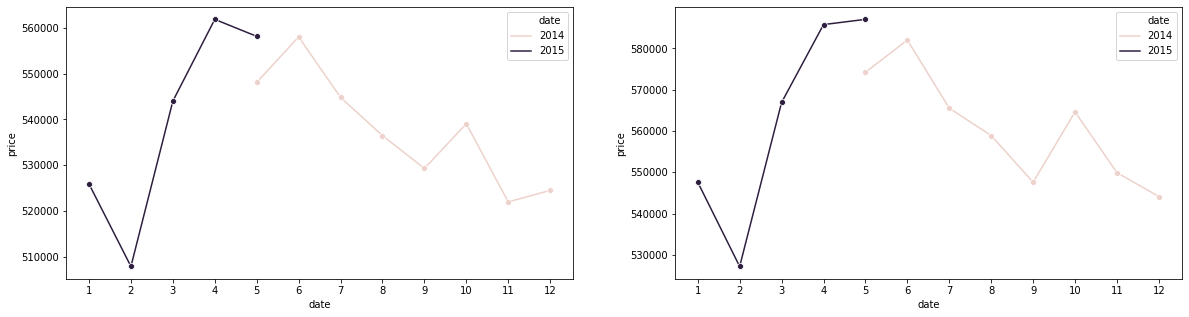

In [13]:
# H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.lineplot(data=data, x=data['date'].dt.month, y='price', marker='o', hue=data['date'].dt.year, estimator='mean', ci=None, ax=ax1).set_xticks(range(1,13));

# H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%
bedroom_chart = data[data['bedrooms'] >= 3][['date', 'price']]
sns.lineplot(data=bedroom_chart, x=bedroom_chart['date'].dt.month, y='price', estimator='mean', hue=bedroom_chart['date'].dt.year, marker='o', ci=None, ax=ax2).set_xticks(range(1,13));

In [14]:
# H6: Imóveis anunciados no verão são 10% mais caros, na média
# Summer
others_season = data[(data['date'].dt.month <= 6) | (data['date'].dt.month >= 10)]['price'].describe()
summer_season = data[(data['date'].dt.month >= 7) & (data['date'].dt.month <= 9)]['price'].describe()

summer_analysis = pd.concat([summer_season, others_season], axis=1, ignore_index=True)
summer_analysis = summer_analysis.rename(columns={0: 'summer_season', 1: 'others_season'})
summer_analysis['summer/others'] = summer_analysis['summer_season']/summer_analysis['others_season'] - 1
summer_analysis

,summer_season,others_season,summer/others
count,5925.00,15688.00,-0.62
mean,537405.58,541101.28,-0.01
std,362459.20,368881.21,-0.02
min,85000.00,75000.00,0.13
25%,325000.00,320000.00,0.02
50%,450000.00,450000.00,0.00
75%,640000.00,645000.00,-0.01
max,6885000.00,7700000.00,-0.11


In [15]:
# Spring

others_season = data[(data['date'].dt.month <= 3) | (data['date'].dt.month >= 7)]['price'].describe()
spring_season = data[(data['date'].dt.month >= 4) & (data['date'].dt.month <= 6)]['price'].describe()

spring_analysis = pd.concat([spring_season, others_season], axis=1, ignore_index=True)
spring_analysis = spring_analysis.rename(columns={0: 'spring_season', 1: 'others_season'})
spring_analysis['spring/others'] = spring_analysis['spring_season']/spring_analysis['others_season'] - 1
spring_analysis

,spring_season,others_season,spring/others
count,6825.00,14788.00,-0.54
mean,556697.54,532422.52,0.05
std,376906.19,362281.20,0.04
min,78000.00,75000.00,0.04
25%,333000.00,316000.00,0.05
50%,465950.00,445000.00,0.05
75%,660000.00,635000.00,0.04
max,7062500.00,7700000.00,-0.08


In [16]:
# H7: Imóveis reformados são 15% mais caros, na mesma região e na média
data['is_renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)
data_renovated = pd.pivot_table(data, values='price', index='zipcode', columns='is_renovated')
data_renovated['1/0'] = (data_renovated[1]/data_renovated[0]) - 1
print('Qtde de regiões: ' + str(data_renovated.shape[0]))
print('Maior que 15%: ' + str(data_renovated[data_renovated['1/0'] >= 0.15].shape[0]))
print('Entre 0% e 15%: ' + str(70 - data_renovated[data_renovated['1/0'] >= 0.15].shape[0] - data_renovated[data_renovated['1/0'] <= 0].shape[0]))
print('Menor que 0%: ' + str(data_renovated[data_renovated['1/0'] <= 0].shape[0]))

Qtde de regiões: 70
Maior que 15%: 34
Entre 0% e 15%: 16
Menor que 0%: 20


##     1. Quais são os imóveis que a House Rocket deve comprar e por qual preço?
- Calcular a mediana de preço por zipcode (região)
- Identificar imóveis com boas condições

Comprar imóveis com as seguintes features:
- Abaixo da mediana de preço por zipcode e em boas condições (condition 4 ou 5)
- Abaixo da mediana de preço por view de 3 e 4 e em boas condições (condition 4 ou 5)
- Abaixo da mediana de preço por tamanho e em boas condições (condition 4 ou 5)

In [17]:
percentile_25 = np.percentile(data['price'], 25)

In [18]:
mediana = data['price'].median()

In [19]:
np.percentile(data['price'], 75)

645000.0

##     2. Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?
- Calcular a mediana de preço por zipcode (região) e por sazonalidade (Summer, Inter)
- Comparar o preço com a mediana e as sazonalidades